In [1]:
# 구글 드라이브 불러오기

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install fxcmpy==1.1.33

     |████████████████████████████████| 204kB 7.5MB/s 
  Created wheel for fxcmpy: filename=fxcmpy-1.1.33-cp36-none-any.whl size=28630 sha256=0942c6c087ab2ebe3db6d210ac9dfc7ba827bd1b60d93415cdd881fd7f5951ca
  Stored in directory: /root/.cache/pip/wheels/ae/c9/ac/7506b0e18032fd56869d3cbc59ddd7b0650d6d229f41840d18
  Created wheel for socketIO-client: filename=socketIO_client-0.7.2-cp36-none-any.whl size=23705 sha256=671729550359b6a6dfd88b9a3f449b268cb7b2287843a01d7e45e69a38c151d0
  Stored in directory: /root/.cache/pip/wheels/bd/5d/9f/ebc0c223ec59641877c817eb10442627e69af88c126f1f53a8
Successfully built fxcmpy socketIO-client


In [5]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import cufflinks as cf
from pylab import plt
import fxcmpy
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import scipy.stats as scs
import pickle

## Automated Trading

### Capital Management

#### The Kelly Criterion in a Binomial Setting

In [6]:
np.random.seed(1000)
plt.style.use('seaborn')
%matplotlib inline

In [7]:
p = 0.55

In [8]:
f = p - (1-p)

In [9]:
f

0.10000000000000009

In [10]:
I = 50

In [11]:
n = 100

In [12]:
def run_simulation(f):
    c = np.zeros((n, I))
    c[0] = 100
    for i in range(I):
        for t in range(1, n):
            o = np.random.binomial(1, p)
            if o > 0:
                c[t, i] = (1 + f) * c[t - 1, i]
            else:
                c[t, i] = (1 - f) * c[t - 1, i]
    return c

In [13]:
c_1 = run_simulation(f)

In [14]:
c_1.round(2)

array([[100.  , 100.  , 100.  , ..., 100.  , 100.  , 100.  ],
       [ 90.  , 110.  ,  90.  , ..., 110.  ,  90.  , 110.  ],
       [ 99.  , 121.  ,  99.  , ..., 121.  ,  81.  , 121.  ],
       ...,
       [226.35, 338.13, 413.27, ..., 123.97, 123.97, 123.97],
       [248.99, 371.94, 454.6 , ..., 136.37, 136.37, 136.37],
       [273.89, 409.14, 409.14, ..., 122.73, 150.01, 122.73]])

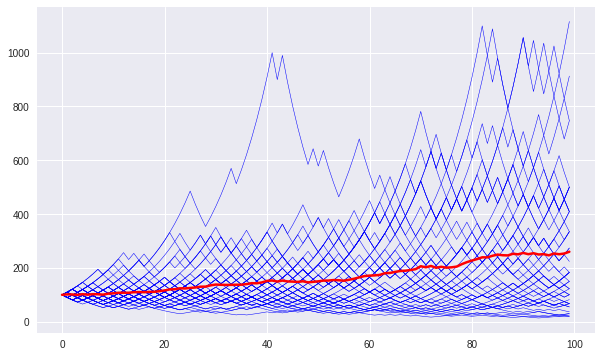

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(c_1, 'b', lw=0.5)
plt.plot(c_1.mean(axis=1), 'r', lw=2.5);

In [16]:
c_2 = run_simulation(0.05)

In [17]:
c_3 = run_simulation(0.25)

In [18]:
c_4 = run_simulation(0.5)

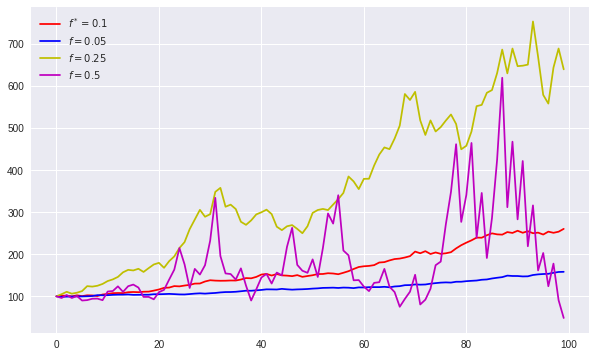

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')
plt.plot(c_2.mean(axis=1), 'b', label='$f=0.05$')
plt.plot(c_3.mean(axis=1), 'y', label='$f=0.25$')
plt.plot(c_4.mean(axis=1), 'm', label='$f=0.5$')
plt.legend(loc=0);

#### The Kelly Criterion for Stocks and Indices

In [20]:
raw = pd.read_csv('/content/drive/My Drive/Python_for_Finance/data/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)

In [21]:
symbol = '.SPX'

In [22]:
data = pd.DataFrame(raw[symbol])

In [23]:
data['returns'] = np.log(data / data.shift(1))

In [24]:
data.dropna(inplace=True)

In [25]:
data.tail()

,.SPX,returns
Date,,
2017-10-25,2557.15,-0.004674
2017-10-26,2560.40,0.001270
2017-10-27,2581.07,0.008041
2017-10-30,2572.83,-0.003198
2017-10-31,2575.26,0.000944


In [27]:
mu = data.returns.mean() * 252
mu

0.10497958736209638

In [28]:
sigma = data.returns.std() * 252 ** 0.5
sigma

0.14873313291524654

In [29]:
r = 0.0

In [30]:
f = (mu - r) / sigma ** 2
f

4.745581205295792

In [31]:
equs = []

In [32]:
def kelly_strategy(f):
    global equs
    equ = 'equity_{:.2f}'.format(f)
    equs.append(equ)
    cap = 'capital_{:.2f}'.format(f)
    data[equ] = 1
    data[cap] = data[equ] * f
    for i, t in enumerate(data.index[1:]):
        t_1 = data.index[i]
        data.loc[t, cap] = data[cap].loc[t_1] * math.exp(data['returns'].loc[t])
        data.loc[t, equ] = data[cap].loc[t] - data[cap].loc[t_1] + data[equ].loc[t_1]
        data.loc[t, cap] = data[equ].loc[t] * f

In [33]:
kelly_strategy(f * 0.5)

In [34]:
kelly_strategy(f * 0.66)

In [35]:
kelly_strategy(f)

In [36]:
print(data[equs].tail())

            equity_2.37  equity_3.13  equity_4.75
Date                                             
2017-10-25     5.158598     7.078804     9.832185
2017-10-26     5.174155     7.106983     9.891486
2017-10-27     5.273268     7.286684    10.270438
2017-10-30     5.233323     7.213824    10.114839
2017-10-31     5.245051     7.235164    10.160175


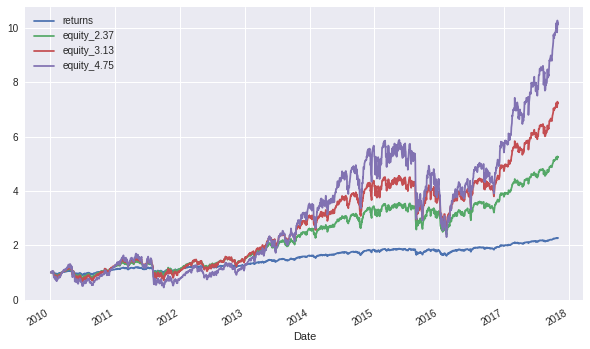

In [37]:
ax = data['returns'].cumsum().apply(np.exp).plot(legend=True, figsize=(10, 6))
data[equs].plot(ax=ax, legend=True);

### ML-Based Trading Strategy

fxcm 문제로 인하여 생략함

### Online Algorithm

fxcm 문제로 인하여 생략함

### Infrastructure and Deployment

### Logging and Monitoring

### Python Scripts

#### Automated Trading Strategy

pkl error

fxcm 문제

In [46]:
#
# Automated ML-Based Trading Strategy for FXCM
# Online Algorithm, Logging, Monitoring
#
# Python for Finance, 2nd ed.
# (c) Dr. Yves J. Hilpisch
#
import zmq
import time
import pickle
import fxcmpy
import numpy as np
import pandas as pd
import datetime as dt

sel = ['tradeId', 'amountK', 'currency', 
       'grossPL', 'isBuy']

log_file = 'automated_strategy.log'

# loads the persisted algorithm object
algorithm = pickle.load(open('algorithm.pkl', 'rb'))

# sets up the socket communication via ZeroMQ (here: "publisher")
context = zmq.Context()
socket = context.socket(zmq.PUB)

# this binds the socket communication to all IP addresses of the machine
socket.bind('tcp://0.0.0.0:5555')

def logger_monitor(message, time=True, sep=True):
    ''' 
    Custom logger and monitor function.
    '''
    with open(log_file, 'a') as f:
        t = str(dt.datetime.now())
        msg = ''
        if time:
            msg += '\n' + t + '\n'
        if sep:
            msg += 66 * '=' + '\n'
        msg += message + '\n\n'
        # sends the message via the socket
        socket.send_string(msg)
        # writes the message to the log file
        f.write(msg)

def report_positions(pos):
    ''' 
    Prints, logs and sends position data.
    '''
    out = '\n\n' + 50 * '=' + '\n'
    out += 'Going {}.\n'.format(pos) + '\n'
    time.sleep(2) # waits for the order to be executed
    out += str(api.get_open_positions()[sel]) + '\n'
    out += 50 * '=' + '\n'
    logger_monitor(out)
    print(out)

def automated_strategy(data, dataframe):
    ''' 
    Callback function embodying the trading logic.
    '''
    global min_bars, position, df
    # resampling of the tick data
    df = dataframe.resample(bar, label='right').last().ffill()

    if len(df) > min_bars:
        min_bars = len(df)
        logger_monitor('NUMBER OF TICKS: {} | '.format(len(dataframe)) +
                       'NUMBER OF BARS: {}'.format(min_bars))
        # data processing and feature preparation
        df['Mid'] = df[['Bid', 'Ask']].mean(axis=1)
        df['Returns'] = np.log(df['Mid'] / df['Mid'].shift(1))
        df['Direction'] = np.where(df['Returns'] > 0, 1, -1)
        # picks relevant points
        features = df['Direction'].iloc[-(lags + 1):-1]
        # necessary reshaping
        features = features.values.reshape(1, -1)
        # generates the signal (+1 or -1)
        signal = algorithm.predict(features)[0]
        
        # logs and sends major financial information
        logger_monitor('MOST RECENT DATA\n' +
                       str(df[['Mid', 'Returns', 'Direction']].tail()),
                       False)
        logger_monitor('features: ' + str(features) + '\n' +
                       'position: ' + str(position) + '\n' +
                       'signal: ' + str(signal), False)
        
        # trading logic
        if position in [0, -1] and signal == 1:
            # going long
            api.create_market_buy_order(
                symbol, size - position * size) # places a buy order
            position = 1 # changes position to long
            report_positions('LONG')
        elif position in [0, 1] and signal == -1: 
            # going short? 
            api.create_market_sell_order(
                symbol, size + position * size) # places a sell order
            position = -1 # changes position to short
            report_positions('SHORT')
        else: 
            # no trade
            logger_monitor('no trade placed')
        logger_monitor('****END OF CYCLE***\n\n', False, False)
    if len(dataframe) > 350: 
        # stopping condition
        api.unsubscribe_market_data('EUR/USD') # unsubscribes from data stream
        report_positions('CLOSE OUT')
        api.close_all() # closes all open positions
        logger_monitor('***CLOSING OUT ALL POSITIONS***')
if __name__ == '__main__':
    symbol = 'EUR/USD' # symbol to be traded
    bar = '15s' # bar length; adjust for testing and deployment
    size = 100 # position size in thousand currency units
    position = 0 # initial position
    lags = 5 # number of lags for features data
    min_bars = lags + 1 # minimum length for resampled DataFrame
    df = pd.DataFrame()
    # adjust configuration file location
    api = fxcmpy.fxcmpy(config_file='../fxcm.cfg')
    # the main asynchronous loop using the callback function
    api.subscribe_market_data(symbol, (automated_strategy,))

FileNotFoundError: ignored

#### Strategy Monitoring

In [ ]:
#
# Automated ML-Based Trading Strategy for FXCM
# Strategy Monitoring via Socket Communication
#
# Python for Finance, 2nd ed.
# (c) Dr. Yves J. Hilpisch
#
import zmq

# sets up the socket communication via ZeroMQ (here: "subscriber")
context = zmq.Context()
socket = context.socket(zmq.SUB)
# adjust the IP address to reflect the remote location
socket.connect('tcp://REMOTE_IP_ADDRESS:5555')
# configures the socket to retrieve every message
socket.setsockopt_string(zmq.SUBSCRIBE, '')
while True:
    msg = socket.recv_string()
    print(msg)